# Support Vector Machine Part 2

Support Vector Machines(SVM) is use to solve both linear and non-linear models. SVM is used for classification or regression problems. In addition, is a method that transform the data and figures the data transformations by finding optimal boundary between the outputs. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2018-02-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700,0,1,1,0.051913
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000,0,1,0,0.049351
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900,0,0,1,-0.019802
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000,0,0,0,0.033670
2018-01-09,12.00,12.02,11.71,11.82,11.82,62560900,0,0,1,-0.037459


In [4]:
dataset['Target'] = 0
dataset.loc[dataset['Returns']>0, 'Target'] = 1
dataset.loc[dataset['Returns']<0, 'Target'] = -1

In [5]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns,Target
Date,,,,,,,,,,,
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700,0,1,1,0.051913,1
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000,0,1,0,0.049351,1
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900,0,0,1,-0.019802,-1
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000,0,0,0,0.033670,1
2018-01-09,12.00,12.02,11.71,11.82,11.82,62560900,0,0,1,-0.037459,-1


Data pre-processing and selection

In [6]:
features_df = dataset[['Open', 'High', 'Low', 'Adj Close', 'Returns']] 
X = np.asarray(features_df) # Features
X[0:5]

array([[11.61      , 12.14      , 11.36      , 11.55      ,  0.05191257],
       [12.1       , 12.43      , 11.97      , 12.12      ,  0.04935065],
       [12.19      , 12.22      , 11.66      , 11.88      , -0.01980198],
       [12.01      , 12.3       , 11.85      , 12.28      ,  0.03367003],
       [12.        , 12.02      , 11.71      , 11.82      , -0.03745928]])

In [7]:
target = dataset['Buy_Sell'].astype('int')
Y = np.asarray(target)  # Target variable
Y[0:5]

array([1, 0, 1, 0, 1])

In [8]:
print(X.shape)
print(Y.shape)

(21, 5)
(21,)


In [9]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

C:\Users\Tin Hang\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (16, 5) (16,)
Test set: (5, 5) (5,)


Modelling SVM

In [11]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 1, 1, 1, 1])

Evaluation

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       0.75      1.00      0.86         3

avg / total       0.85      0.80      0.78         5

Confusion matrix, without normalization
[[3 0]
 [0 0]]


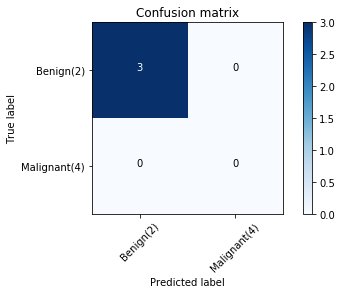

In [19]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [16]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7809523809523808

In [17]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8

In [18]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))

Avg F1-score: 0.7810
Jaccard score: 0.8000
